In [7]:
!pip install tensorflow tensorflow-hub opencv-python matplotlib

In [10]:
# import the necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [12]:
# Function to load and process images
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))  # Resize to 256x256 for faster processing
    img = np.array(img) / 255.0  # Normalize
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Function to save the stylized image
def save_image(image, filename):
    image = np.squeeze(image)  # Remove batch dimension
    image = (image * 255).astype(np.uint8)  # Convert back to uint8
    cv2.imwrite(filename, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Function to display images
def show_image(image, title="Image"):
    plt.imshow(np.squeeze(image))
    plt.axis("off")
    plt.title(title)
    plt.show()

In [18]:
content_path = "/content/my_images/content.jpg"
style_path = "/content/my_images/style.jpg"


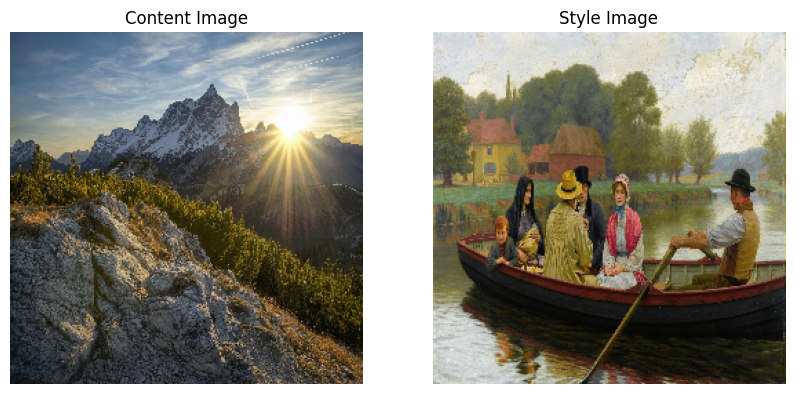

In [19]:
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))  # Resize to 256x256 for faster processing
    img = img / 255.0  # Normalize
    return img

# Load images
content_image = load_image(content_path)
style_image = load_image(style_path)

# Display images
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(content_image)
plt.axis("off")
plt.title("Content Image")

plt.subplot(1,2,2)
plt.imshow(style_image)
plt.axis("off")
plt.title("Style Image")

plt.show()


✅ Model loaded successfully!
Applying style transfer...


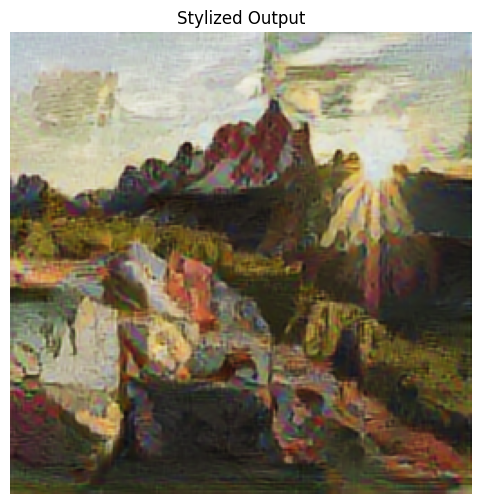

In [20]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load model
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
print("✅ Model loaded successfully!")

# Convert images to TensorFlow tensors
content_image = np.expand_dims(content_image, axis=0).astype(np.float32)
style_image = np.expand_dims(style_image, axis=0).astype(np.float32)

# Apply style transfer
print("Applying style transfer...")
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

# Convert back to display
stylized_image = np.squeeze(stylized_image)  # Remove batch dimension
stylized_image = (stylized_image * 255).astype(np.uint8)

# Display output
plt.figure(figsize=(6,6))
plt.imshow(stylized_image)
plt.axis("off")
plt.title("Stylized Output")
plt.show()
